<IPython.core.display.Javascript object>


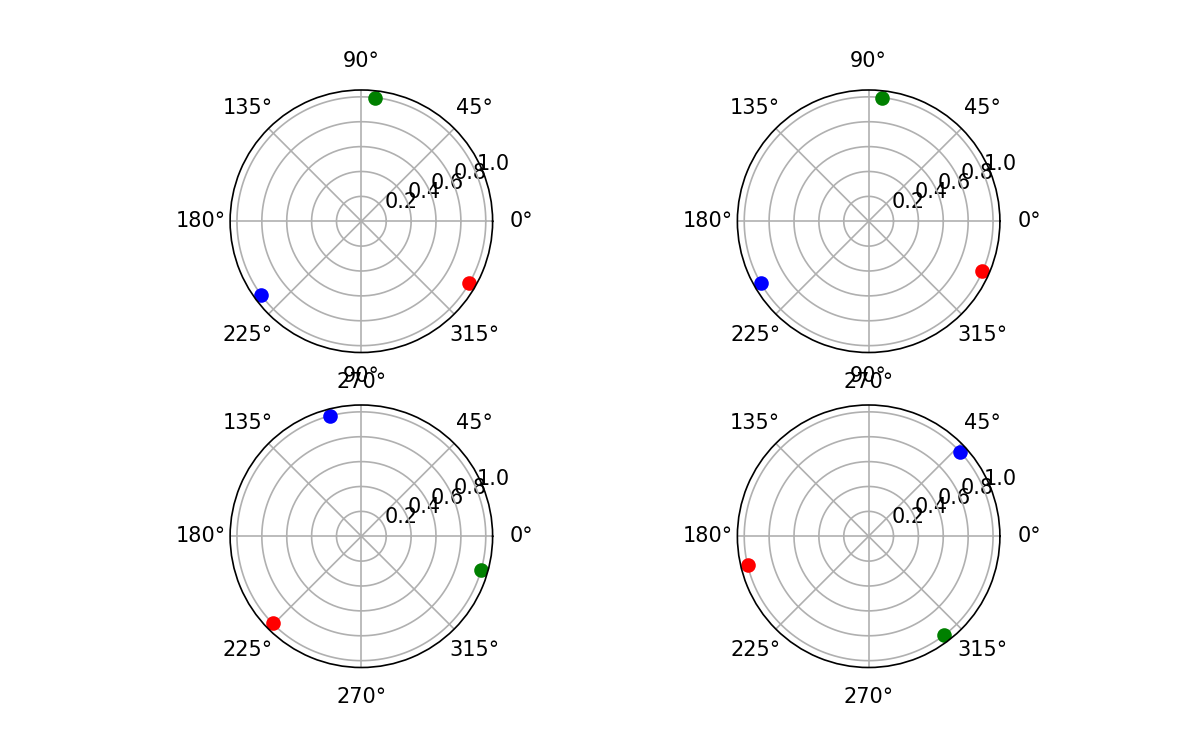

In [33]:
# Importing neccessary libraries

import numpy as np
import math
import matplotlib.pyplot as plt
#from matplotlib.widgets import Cursor
import matplotlib.animation as animation
from scipy.fftpack import fft
%matplotlib notebook

w_1 = -3
w_2 = 2
w_3 = -2
k = 10
m = 1
A = .15
B = 0
phi_1 = 0
phi_2 = 0
v_0 = 1

def e1genstate(k,m,A,B,t,phi_1,phi_2):
    theta_1 = A*np.sin(np.sqrt(3*k/m) * t + phi_1)+ B*np.cos(np.sqrt(3*k/m) * t + phi_2)+np.pi/2
    theta_2 = 0*t - np.pi/6
    theta_3 = -1*(A*np.sin(np.sqrt(3*k/m) * t + phi_1)+ B*np.cos(np.sqrt(3*k/m) * t + phi_2)) + 7*np.pi/6
    return theta_1,theta_2,theta_3

def e2genstate(k,m,A,B,t,phi_1,phi_2):
    theta_1 = A*np.sin(np.sqrt(3*k/m) * t + phi_1)+ B*np.cos(np.sqrt(3*k/m) * t + phi_2)+np.pi/2
    theta_2 = -1*(A*np.sin(np.sqrt(3*k/m) * t + phi_1)+ B*np.cos(np.sqrt(3*k/m) * t + phi_2)) - np.pi/6
    theta_3 = 0*t + 7*np.pi/6
    return theta_1,theta_2,theta_3

def e3genstate(k,m,A,B,t,phi_1,phi_2,v_0):
    theta_1 = A*np.sin(np.sqrt(0) * t + phi_1)+ B*np.cos(np.sqrt(0) * t + phi_2) + np.pi/2 + v_0*t
    theta_2 = A*np.sin(np.sqrt(0) * t + phi_1)+ B*np.cos(np.sqrt(0) * t + phi_2) - np.pi/6 + v_0*t
    theta_3 = A*np.sin(np.sqrt(0) * t + phi_1)+ B*np.cos(np.sqrt(0) * t + phi_2) + 7*np.pi/6 + v_0*t
    return theta_1,theta_2,theta_3

def sum_eigenstates(w_1,w_2,w_3,k,m,A,B,t,phi_1,phi_2,v_0):
    theta_11,theta_21,theta_31 = e1genstate(k,m,A,B,t,phi_1,phi_2)
    theta_12,theta_22,theta_32 = e2genstate(k,m,A,B,t,phi_1,phi_2)
    theta_13,theta_23,theta_33 = e3genstate(k,m,A,B,t,phi_1,phi_2,v_0)
    theta_14 = w_1*(theta_11 - np.pi/2) + w_2*(theta_12 - np.pi/2) + w_3*(theta_13 - np.pi/2) + np.pi/2
    theta_24 = w_1*(theta_21 + np.pi/6) + w_2*(theta_22 + np.pi/6) + w_3*(theta_23 + np.pi/6) - np.pi/6
    theta_34 = w_1*(theta_31 - 7*np.pi/6) + w_2*(theta_32 - 7*np.pi/6) + w_3*(theta_33 - 7*np.pi/6) + 7*np.pi/6
    return theta_14,theta_24,theta_34

t = np.linspace(0,10,600)
theta_11,theta_21,theta_31 = e1genstate(k,m,A,B,t,phi_1,phi_2)
theta_12,theta_22,theta_32 = e2genstate(k,m,A,B,t,phi_1,phi_2)
theta_13,theta_23,theta_33 = e3genstate(k,m,A,B,t,phi_1,phi_2,v_0)
theta_14,theta_24,theta_34 = sum_eigenstates(w_1,w_2,w_3,k,m,A,B,t,phi_1,phi_2,v_0)

r = np.full(600,1)
fig = plt.figure(figsize=(8,5))
ax1 = plt.subplot(221, polar=True)
ax2 = plt.subplot(222, polar=True)
ax3 = plt.subplot(223, polar=True)
ax4 = plt.subplot(224, polar=True)
line11, = ax1.plot(theta_11, r, 'go-')
line21, = ax1.plot(theta_21, r, 'ro-')
line31, = ax1.plot(theta_31, r, 'bo-')
line12, = ax2.plot(theta_12, r, 'go-')
line22, = ax2.plot(theta_22, r, 'ro-')
line32, = ax2.plot(theta_32, r, 'bo-')
line13, = ax3.plot(theta_13, r, 'go-')
line23, = ax3.plot(theta_23, r, 'ro-')
line33, = ax3.plot(theta_33, r, 'bo-')
line14, = ax4.plot(theta_14, r, 'go-')
line24, = ax4.plot(theta_24, r, 'ro-')
line34, = ax4.plot(theta_34, r, 'bo-')

def update(num, theta_11, theta_21, theta_31,
                theta_12, theta_22, theta_32,
                theta_13, theta_23, theta_33,
                theta_14, theta_24, theta_34,
                line11, line21, line31,
                line12, line22, line32,
                line13, line23, line33,
                line14, line24, line34,
                r):
    line11.set_data(theta_11[num], r[num])
    line21.set_data(theta_21[num], r[num])
    line31.set_data(theta_31[num], r[num])
    line12.set_data(theta_12[num], r[num])
    line22.set_data(theta_22[num], r[num])
    line32.set_data(theta_32[num], r[num])
    line13.set_data(theta_13[num], r[num])
    line23.set_data(theta_23[num], r[num])
    line33.set_data(theta_33[num], r[num])
    line14.set_data(theta_14[num], r[num])
    line24.set_data(theta_24[num], r[num])
    line34.set_data(theta_34[num], r[num])
    #line.axes.axis([-1.5, 1.5, -1.5, 1.5]) # Change this to adjust your axes. Format is: [x_low, x_high, y_low, y_high]
    return line11, line21, line31, line12, line22, line32, line13, line23, line33, line14, line24, line34

ani = animation.FuncAnimation(fig, update, frames=len(t), fargs=[theta_11, theta_21, theta_31,
                                                          theta_12, theta_22, theta_32,
                                                          theta_13, theta_23, theta_33,
                                                          theta_14, theta_24, theta_34,
                                                          line11, line21, line31, 
                                                          line12, line22, line32,
                                                          line13, line23, line33,
                                                          line14, line24, line34,
                                                          r],
                              interval=5, blit=True) # Interval is how quickly the animation updates in units of milliseconds.
                                                     # Decrease to increase the speed of the animation, but can be computationally
                                                     # intensive.
#fig.delaxes(ax1)
#fig.delaxes(ax2)
#fig.delaxes(ax3)
plt.show()
